In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('~/Downloads/logatta.csv')

print(data.head())

encoder = OrdinalEncoder()
scaler = StandardScaler()

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_encoded = encoder.fit_transform(X)

X_scaled = scaler.fit_transform(X_encoded)

   Age     BusinessTravel  Education MaritalStatus OverTime  EmployeeNumber  \
0   41      Travel_Rarely          2        Single      Yes               1   
1   49  Travel_Frequently          1       Married       No               2   
2   37      Travel_Rarely          2        Single      Yes               4   
3   33  Travel_Frequently          4       Married      Yes               5   
4   27      Travel_Rarely          1       Married       No               7   

   DailyRate  Gender  accepted for the interview  
0       1102  Female                        True  
1        279    Male                       False  
2       1373    Male                       False  
3       1392  Female                       False  
4        591    Male                       False  


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_pred = log_reg.predict(X_test)

nb_score = nb.score(X_test, y_test)
nb_pred = nb.predict(X_test)

knn_score = knn.score(X_test, y_test)
knn_pred = knn.predict(X_test)

print(f"Logistic Regression Accuracy: {log_reg_score}")
print(f"Naive Bayes Accuracy: {nb_score}")
print(f"KNN Accuracy: {knn_score}")

Logistic Regression Accuracy: 0.9163879598662207
Naive Bayes Accuracy: 0.8695652173913043
KNN Accuracy: 0.9565217391304348


In [17]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, log_reg_pred))
print("Logistic Regression Confusion Matrix")
print(confusion_matrix(y_test, log_reg_pred))

print("Naive Bayes Classification Report")
print(classification_report(y_test, nb_pred))
print("Naive Bayes Confusion Matrix")
print(confusion_matrix(y_test, nb_pred))

print("KNN Classification Report")
print(classification_report(y_test, knn_pred))
print("KNN Confusion Matrix")
print(confusion_matrix(y_test, knn_pred))

Logistic Regression Classification Report
              precision    recall  f1-score   support

       False       0.94      0.97      0.95       268
        True       0.65      0.42      0.51        31

    accuracy                           0.92       299
   macro avg       0.79      0.70      0.73       299
weighted avg       0.91      0.92      0.91       299

Logistic Regression Confusion Matrix
[[261   7]
 [ 18  13]]
Naive Bayes Classification Report
              precision    recall  f1-score   support

       False       1.00      0.86      0.92       268
        True       0.44      0.97      0.61        31

    accuracy                           0.87       299
   macro avg       0.72      0.91      0.76       299
weighted avg       0.94      0.87      0.89       299

Naive Bayes Confusion Matrix
[[230  38]
 [  1  30]]
KNN Classification Report
              precision    recall  f1-score   support

       False       0.97      0.98      0.98       268
        True       0.82

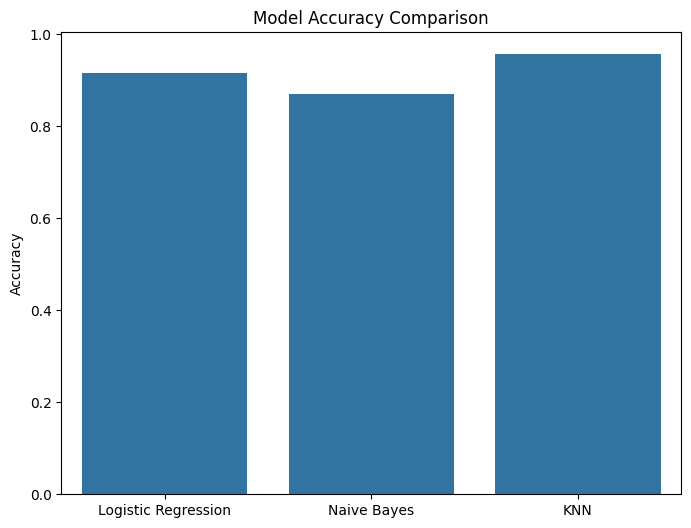

In [18]:
scores = [log_reg_score, nb_score, knn_score]
models = ['Logistic Regression', 'Naive Bayes', 'KNN']

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=scores)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()